<a href="https://colab.research.google.com/github/socd06/openvino_collab/blob/master/2_16_Exercise_Deploy_An_App_at_the_Edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-01-01

# Install Intel OpenVINO

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%%time
%%capture
## install tools
!sudo apt-get install -y pciutils cpio
!sudo apt autoremove
## downnload installation files
# !wget http://registrationcenter-download.intel.com/akdlm/irc_nas/16057/l_openvino_toolkit_p_2019.3.376.tgz
# path = "/content/l_openvino_toolkit_p_2019.3.376.tgz"
path = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/l_openvino_toolkit_p_2019.3.376.tgz"
## install openvino
!tar xf "{path}" && \
    cd l_openvino_toolkit_p* && \
    ./install_openvino_dependencies.sh && \
    sed -i 's/decline/accept/g' silent.cfg && \
    ./install.sh --silent silent.cfg
## install dependencies
!/opt/intel/openvino/install_dependencies/install_openvino_dependencies.sh
## install prerequisites
!/opt/intel/openvino/deployment_tools/model_optimizer/install_prerequisites/install_prerequisites.sh

CPU times: user 799 ms, sys: 142 ms, total: 942 ms
Wall time: 2min 21s


# Run a demo

In [0]:
%%time
'''
CPU times: user 1.02 s, sys: 134 ms, total: 1.15 s
Wall time: 3min 12s
'''
## run demo
!source /opt/intel/openvino/bin/setupvars.sh && \
    /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh

# Udacity Exercise 2.16 Exercise: Deploy An App at the Edge  

[How to download pre-trained models](https://colab.research.google.com/drive/1Qm9AnHoUcN6s738bo7pmJxp10nmOq8O-?authuser=1#scrollTo=EWYR0k53ddik&line=6&uniqifier=1)   

In [0]:
## check models downloaded
!ls -ahl "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel"

total 16K
drwx------ 2 root root 4.0K Jan  2 00:18 human-pose-estimation-0001
drwx------ 2 root root 4.0K Mar 30  2018 ssd_mobilenet_v2_coco_2018_03_29
drwx------ 2 root root 4.0K Jan  2 00:18 text-detection-0004
drwx------ 2 root root 4.0K Jan  2 00:18 vehicle-attributes-recognition-barrier-0039


In [0]:
%%capture
%cd /content
## download folder of github repo
!sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

/content/exercise/002_deploy_an_app_at_the_edge
(667, 1000, 3)


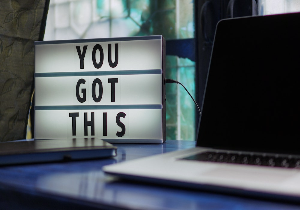

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

## display test image
%cd /content/exercise/002_deploy_an_app_at_the_edge
POSE_IMAGE = cv2.imread("../images/sign.jpg")
print(POSE_IMAGE.shape)
img = cv2.resize(POSE_IMAGE, (300, 210))
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img) # cv2.imshow()

[setupvars.sh] OpenVINO environment initialized
Dimensions: (667, 1000, 3)


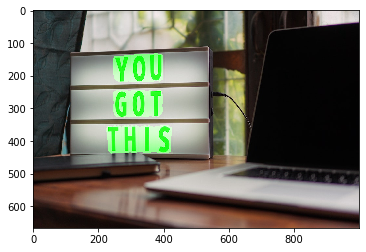

In [0]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/sign.jpg" \
    -t "TEXT" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/text-detection-0004/FP16/text-detection-0004.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/TEXT-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

[setupvars.sh] OpenVINO environment initialized
Dimensions: (562, 1000, 3)


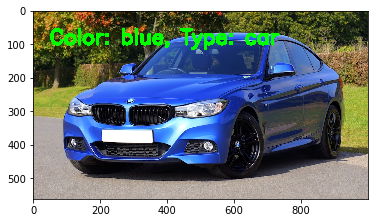

In [0]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/blue-car.jpg" \
    -t "CAR_META" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/CAR_META-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

[setupvars.sh] OpenVINO environment initialized
Dimensions: (750, 1000, 3)


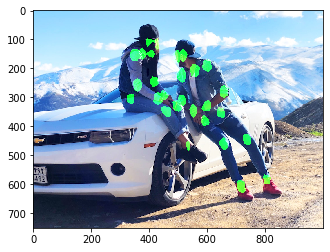

In [0]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /content/exercise/002_deploy_an_app_at_the_edge/app.py \
    -i "../images/sitting-on-car.jpg" \
    -t "POSE" \
    -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml" \
    -c "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

## display result
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/POSE-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

In [0]:
%%writefile testapp.py
import cv2
import numpy as np
from handle_models import handle_output, preprocessing
from inference import Network
import os

CAR_COLORS = ["white", "gray", "yellow", "red", "green", "blue", "black"]
CAR_TYPES = ["car", "bus", "truck", "van"]

def create_output_image(model_type, image, output):
    '''
    Using the model type, input image, and processed output,
    creates an output image showing the result of inference.
    '''
    if model_type == "POSE":
        # Remove final part of output not used for heatmaps
        output = output[:-1]
        # Get only pose detections above 0.5 confidence, set to 255
        for c in range(len(output)):
            output[c] = np.where(output[c]>0.5, 255, 0)
        # Sum along the "class" axis
        output = np.sum(output, axis=0)
        # Get semantic mask
        pose_mask = get_mask(output)
        # Combine with original image
        image = image + pose_mask
        return image
    elif model_type == "TEXT":
        # Get only text detections above 0.5 confidence, set to 255
        output = np.where(output[1]>0.5, 255, 0)
        # Get semantic mask
        text_mask = get_mask(output)
        # Add the mask to the image
        image = image + text_mask
        return image
    elif model_type == "CAR_META":
        # Get the color and car type from their lists
        color = CAR_COLORS[output[0]]
        car_type = CAR_TYPES[output[1]]
        # Scale the output text by the image shape
        scaler = max(int(image.shape[0] / 1000), 1)
        # Write the text of color and type onto the image
        image = cv2.putText(image, 
            "Color: {}, Type: {}".format(color, car_type), 
            (50 * scaler, 100 * scaler), cv2.FONT_HERSHEY_SIMPLEX, 
            2 * scaler, (255, 255, 255), 10 * scaler)
        return image
    else:
        print("Unknown model type, unable to create output image.")
        return image

argsm = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/vehicle-attributes-recognition-barrier-0039/INT8/vehicle-attributes-recognition-barrier-0039.xml"
argsc = "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"
argst = "CAR_META"
argsd = "CPU"

# Create a Network for using the Inference Engine
inference_network = Network()
# Load the model in the network, and obtain its input shape
n, c, h, w = inference_network.load_model(argsm, argsd, argsc)
# Read the input image
path = "../images/blue-car.jpg"
image = cv2.imread(path)
### TODO: Preprocess the input image
preprocessed_image = preprocessing(image, h, w)
# Perform synchronous inference on the image
inference_network.sync_inference(preprocessed_image)
# Obtain the output of the inference request
output = inference_network.extract_output()
### TODO: Handle the output of the network, based on args.t
### Note: This will require using `handle_output` to get the correct
###       function, and then feeding the output to that function.
output_func = handle_output(argst)
processed_output = output_func(output, image.shape)
# Create an output image based on network
output_image = create_output_image(argst, image, processed_output)
# Create directory if not exists
path = "outputs"
if not os.path.exists(path):
    os.makedirs(path)
# Save down the resulting image
path = f"outputs/{argst}-output.png"
result = cv2.imwrite(path, output_image)
if not result: 
    raise Exception(f"cv2.imwrite(\"{path}\") failed")

Writing testapp.py


[setupvars.sh] OpenVINO environment initialized
Dimensions: (562, 1000, 3)


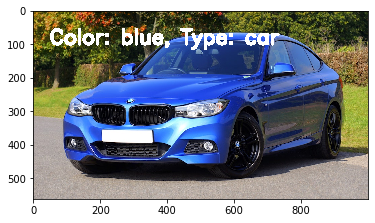

In [0]:
!rm -rf /content/exercise/002_deploy_an_app_at_the_edge/outputs
!source /opt/intel/openvino/bin/setupvars.sh && python testapp.py
## display result
path = "/content/exercise/002_deploy_an_app_at_the_edge/outputs/CAR_META-output.png"
img = np.array(Image.open(path), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);

# Udacity Exercise 3.7 Convert a Tensorflow Model
 https://docs.openvinotoolkit.org/latest/_docs_MO_DG_prepare_model_convert_model_Convert_Model_From_TensorFlow.html  

In [0]:
## download model
%cd /content
url = "http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz"
!wget "{url}"
!tar xf ssd_mobilenet_v2_coco_2018_03_29.tar.gz \
    -C "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel"

In [0]:
## generate IR
%cd "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/ssd_mobilenet_v2_coco_2018_03_29"
!source /opt/intel/openvino/bin/setupvars.sh && \
    python /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
    --input_model frozen_inference_graph.pb \
    --tensorflow_object_detection_api_pipeline_config pipeline.config \
    --reverse_input_channels \
    --tensorflow_use_custom_operations_config \
        /opt/intel/openvino/deployment_tools/model_optimizer/extensions/front/tf/ssd_v2_support.json

/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/ssd_mobilenet_v2_coco_2018_03_29
[setupvars.sh] OpenVINO environment initialized
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
	- Path for generated IR: 	/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/ssd_mobilenet_v2_coco_2018_03_29/.
	- IR output name: 	frozen_inference_graph
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values t

# Udacity Exercise: 3.10 Convert a Caffe Model   

[Example](https://colab.research.google.com/drive/1Qm9AnHoUcN6s738bo7pmJxp10nmOq8O-?authuser=1#scrollTo=YVQ-tqCYhxk-)

# Udacity Exercise: 3.13 Exercise: Convert an ONNX Model   

https://docs.openvinotoolkit.org/2018_R5/_docs_MO_DG_prepare_model_convert_model_Convert_Model_From_ONNX.html

ONNX* is a representation format for deep learning models. ONNX allows AI developers easily transfer models between different frameworks that helps to choose the best combination for them. Today, PyTorch*, Caffe2*, Apache MXNet*, Microsoft Cognitive Toolkit* and other tools are developing ONNX support.   



In [0]:
%%capture
%cd /content
## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

In [0]:
## download model
%cd /content
url = "https://s3.amazonaws.com/download.onnx/models/opset_8/bvlc_alexnet.tar.gz"
!wget "{url}"
!tar -xvf bvlc_alexnet.tar.gz \
    -C "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel"

In [0]:
## generate IR  
!source /opt/intel/openvino/bin/setupvars.sh &&\
    python /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
    --input_model "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/bvlc_alexnet/model.onnx" \
    --framework onnx \
    --output_dir "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/bvlc_alexnet"

[setupvars.sh] OpenVINO environment initialized
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/bvlc_alexnet/model.onnx
	- Path for generated IR: 	/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/bvlc_alexnet
	- IR output name: 	model
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
ONNX specific parameters:
Model Optimizer version: 	2019.3.0-408-gac8584cb7

[ SUCCESS ] Generated IR model.
[ SUCCESS

In [0]:
# !export CLWS=/home/workspace/cl_tutorial
# !export CLT=$CLWS/OpenVINO-Custom-Layers
%set_env CLWS=/home/workspace/cl_tutorial
%set_env CLT=$CLWS/OpenVINO-Custom-Layers
!mkdir -p /home/workspace
!mkdir -p $CLWS
!mkdir -p $CLWS/tf_model
!echo $CLWS 
!echo $CLT

env: CLWS=/home/workspace/cl_tutorial
env: CLT=$CLWS/OpenVINO-Custom-Layers
/home/workspace/cl_tutorial
$CLWS/OpenVINO-Custom-Layers


In [0]:
!source /opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


# Udacity Exercise: 4.5 Feed an IR to the Inference Engine   
Earlier in the course, you were focused on working with the Intermediate Representation (IR) models themselves, while mostly glossing over the use of the actual Inference Engine with the model.

Here, you'll import the Python wrapper for the Inference Engine (IE), and practice using different IRs with it. You will first add each IR as an **IENetwork**, and check whether the layers of that network are supported by the classroom CPU.

Since the classroom workspace is using an Intel CPU, you will also need to add a CPU extension to the **IECore**.

Once you have verified all layers are supported (when the CPU extension is added), you will load the given model into the Inference Engine.

Note that the .xml file of the IR should be given as an argument when running the script.

https://docs.openvinotoolkit.org/latest/_inference_engine_ie_bridges_python_docs_api_overview.html



In [0]:
%%capture
%cd /content
## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

In [0]:
## run the solution code
!source /opt/intel/openvino/bin/setupvars.sh && \
    python /content/exercise/4.05_feed_ir_to_ie/feed_network.py \
        -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml"

[setupvars.sh] OpenVINO environment initialized
IR successfully loaded into Inference Engine.


In [0]:
%%writefile app.py
import argparse
### TODO: Load the necessary libraries
import os
from openvino.inference_engine import IECore
from openvino.inference_engine import IENetwork

CPU_EXTENSION = "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

def get_args():
    '''
    Gets the arguments from the command line.
    '''
    parser = argparse.ArgumentParser("Load an IR into the Inference Engine")
    # -- Create the descriptions for the commands
    m_desc = "The location of the model XML file"

    # -- Create the arguments
    parser.add_argument("-m", help=m_desc)
    args = parser.parse_args()

    return args


def load_to_IE(model_xml):
    ### TODO: Load the Inference Engine API
    ie = IECore()
    ver = ie.get_versions("CPU")["CPU"]
    print("{descr}: {maj}.{min}.{num}".format(descr=ver.description, maj=ver.major, min=ver.minor, num=ver.build_number))
    metrics = ie.get_metric(metric_name="SUPPORTED_METRICS", device_name="CPU")
    print(f"Supported metrics: {metrics}")

    ### TODO: Load IR files into their related class
    # model_bin = ".".join(model_xml.split('.')[:-1]) + '.bin'
    model_bin = os.path.splitext(model_xml)[0] + '.bin'
    net = IENetwork(model=model_xml, weights=model_bin)    

    ### TODO: Add a CPU extension, if applicable. It's suggested to check
    ###       your code for unsupported layers for practice before 
    ###       implementing this. Not all of the models may need it.
    ie.add_extension(extension_path=CPU_EXTENSION, device_name="CPU")

    ### TODO: Get the supported layers of the network
    supported_layers = ie.query_network(network=net, device_name="CPU")

    ### TODO: Check for any unsupported layers, and let the user
    ###       know if anything is missing. Exit the program, if so.
    unsupported_layers = [l for l in net.layers.keys() if l not in supported_layers]
    if len(unsupported_layers) != 0:
        print("Unsupported layers found: {}".format(unsupported_layers))
        print("Check whether extensions are available to add to IECore.")
        exit(1)

    ### TODO: Load the network into the Inference Engine
    exec_net = ie.load_network(net, "CPU")

    print("IR successfully loaded into Inference Engine.")

    return


def main():
    args = get_args()
    load_to_IE(args.m)


if __name__ == "__main__":
    main()

Overwriting app.py


In [0]:
# EXCERSICE = "/content/exercise/4.05_feed_ir_to_ie"
# MODELS = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel"
'''
MKLDNNPlugin: 2.1.32974
Supported metrics: ['AVAILABLE_DEVICES', 'SUPPORTED_METRICS', 'FULL_DEVICE_NAME', 'OPTIMIZATION_CAPABILITIES', 'SUPPORTED_CONFIG_KEYS', 'RANGE_FOR_ASYNC_INFER_REQUESTS', 'RANGE_FOR_STREAMS']
IR successfully loaded into Inference Engine.
'''
!source /opt/intel/openvino/bin/setupvars.sh && \
    python app.py -m "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml"

[setupvars.sh] OpenVINO environment initialized
MKLDNNPlugin: 2.1.32974
Supported metrics: ['AVAILABLE_DEVICES', 'SUPPORTED_METRICS', 'FULL_DEVICE_NAME', 'OPTIMIZATION_CAPABILITIES', 'SUPPORTED_CONFIG_KEYS', 'RANGE_FOR_ASYNC_INFER_REQUESTS', 'RANGE_FOR_STREAMS']
IR successfully loaded into Inference Engine.


# Udacity Exercise: 4.09 Inference Requests    




In [0]:
%%capture
%cd /content
## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

In [0]:
## run the solution code
%cd /content/exercise/4.09_inference_requests
!source /opt/intel/openvino/bin/setupvars.sh && \
    python /content/exercise/4.09_inference_requests/test.py

/content/exercise/4.09_inference_requests
[setupvars.sh] OpenVINO environment initialized
You passed 6 of 6 tests.
Congratulations!


In [0]:
%%writefile /content/exercise/4.09_inference_requests/inference.py
import argparse
import cv2
import time
from helpers import load_to_IE, preprocessing

CPU_EXTENSION = "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"

def get_args():
    '''
    Gets the arguments from the command line.
    '''
    parser = argparse.ArgumentParser("Load an IR into the Inference Engine")
    # -- Create the descriptions for the commands
    m_desc = "The location of the model XML file"
    i_desc = "The location of the image input"
    r_desc = "The type of inference request: Async ('A') or Sync ('S')"

    # -- Create the arguments
    parser.add_argument("-m", help=m_desc)
    parser.add_argument("-i", help=i_desc)
    parser.add_argument("-r", help=i_desc)
    args = parser.parse_args()

    return args


def async_inference(exec_net, input_blob, image):
    ### TODO: Add code to perform asynchronous inference
    ### Note: Return the exec_net
    exec_net.start_async(request_id=0, inputs={input_blob: image})
    while True:
        status = exec_net.requests[0].wait(-1)
        if status == 0:
            break
        else:
            time.sleep(1)
    return exec_net


def sync_inference(exec_net, input_blob, image):
    ### TODO: Add code to perform synchronous inference
    ### Note: Return the result of inference
    result = exec_net.infer({input_blob: image})

    return result


def perform_inference(exec_net, request_type, input_image, input_shape):
    '''
    Performs inference on an input image, given an ExecutableNetwork
    '''
    print("Calling function 'perform_inference'...")
    print("Request type:", request_type)
    # Get input image
    image = cv2.imread(input_image)
    print("Input image shape:", image.shape)
    # Unpack the input shape
    n, c, h, w = input_shape
    # Preprocess it (applies for the IRs from the Pre-Trained Models lesson)
    preprocessed_image = preprocessing(image, h, w)
    print("Preprocessed image shape:", preprocessed_image.shape)

    # Get the input blob for the inference request
    input_blob = next(iter(exec_net.inputs))

    # Perform either synchronous or asynchronous inference
    request_type = request_type.lower()
    if request_type == 'a':
        output = async_inference(exec_net, input_blob, preprocessed_image)
    elif request_type == 's':
        output = sync_inference(exec_net, input_blob, preprocessed_image)
    else:
        print("Unknown inference request type, should be 'A' or 'S'.")
        exit(1)

    # Return the output for testing purposes
    return output


def main():
    args = get_args()
    exec_net, input_shape = load_to_IE(args.m, CPU_EXTENSION)
    perform_inference(exec_net, args.r, args.i, input_shape)


if __name__ == "__main__":
    main()

Overwriting /content/exercise/4.09_inference_requests/inference.py


In [0]:
%%writefile /content/exercise/4.09_inference_requests/test_pose.py
from helpers import load_to_IE, preprocessing
from inference import perform_inference

CPU_EXTENSION = "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64/libcpu_extension_sse4.so"
MODEL_PATH = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/"

OUTPUT_SHAPES = {
    "POSE": {"Mconv7_stage2_L1": (1, 38, 32, 57),
             "Mconv7_stage2_L2": (1, 19, 32, 57)},
    "TEXT": {"model/link_logits_/add": (1, 16, 192, 320),
             "model/segm_logits/add": (1, 2, 192, 320)},
    "CAR META": {"color": (1, 7, 1, 1),
                 "type": (1, 4, 1, 1)}
}
def pose_test():
    counter = 0
    model = MODEL_PATH + "human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml"
    image = "../images/sitting-on-car.jpg"
    print("Model:", model)
    print("Image:", image)
    counter += test(model, "POSE", image)
    return counter

def test(model, model_type, image):
    # Synchronous Test
    counter = 0
    try:
        # Load IE separately to check InferRequest latency
        exec_net, input_shape = load_to_IE(model, CPU_EXTENSION)
        print("Model input shape:", input_shape)
        result = perform_inference(exec_net, "S", image, input_shape)
        output_blob = next(iter(exec_net.outputs))
        # Check for matching output shape to expected
        assert result[output_blob].shape == OUTPUT_SHAPES[model_type][output_blob]
        # Check latency is > 0; i.e. a request occurred
        assert exec_net.requests[0].latency > 0.0
        counter += 1
    except:
        print("Synchronous Inference failed for {} Model.".format(model_type))
    # Asynchronous Test
    try:
        # Load IE separately to check InferRequest latency
        exec_net, input_shape = load_to_IE(model, CPU_EXTENSION)
        exec_net = perform_inference(exec_net, "A", image, input_shape)
        output_blob = next(iter(exec_net.outputs))
        # Check for matching output shape to expected
        assert exec_net.requests[0].outputs[output_blob].shape == OUTPUT_SHAPES[model_type][output_blob]
        # Check latency is > 0; i.e. a request occurred
        assert exec_net.requests[0].latency > 0.0
        counter += 1
    except:
        print("Asynchronous Inference failed for {} Model.".format(model_type))
    return counter

def main():
    counter = pose_test()
    print(f"You have passed {counter} of 2 tests.")

if __name__ == "__main__":
    main()

Overwriting /content/exercise/4.09_inference_requests/test_pose.py


In [0]:
## run the test pose code
%cd /content/exercise/4.09_inference_requests
!source /opt/intel/openvino/bin/setupvars.sh && \
    python /content/exercise/4.09_inference_requests/test_pose.py

/content/exercise/4.09_inference_requests
[setupvars.sh] OpenVINO environment initialized
Model: /content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/workspace/intel/human-pose-estimation-0001/FP16/human-pose-estimation-0001.xml
Image: ../images/sitting-on-car.jpg
Model input shape: [1, 3, 256, 456]
Calling function 'perform_inference'...
Request type: S
Input image shape: (750, 1000, 3)
Preprocessed image shape: (1, 3, 256, 456)
Calling function 'perform_inference'...
Request type: A
Input image shape: (750, 1000, 3)
Preprocessed image shape: (1, 3, 256, 456)
You have passed 2 of 2 tests.


# Udacity Exercise: 4.13 Integrate into an App   

In [0]:
%%capture
%cd /content
## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

# Udactiy Exercise: 5.4 Handling Input Streams   

In [0]:
%%capture
%cd /content
## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

# YOLOv3
Detecting objects in videos and camera feeds using Keras OpenCV, and ImageAI     
Moses Olafenwa, Aug 13, 2018     
https://heartbeat.fritz.ai/detecting-objects-in-videos-and-camera-feeds-using-keras-opencv-and-imageai-c869fe1ebcdb